### Biblioteki używane w rozwiązaniu zadania

In [1]:
import numpy as np
import scipy.interpolate as spline
import matplotlib.pyplot as plt

# Zadanie

W ramach interpolacji rozważamy dwie funkcje: $f_1(x)=\frac{1}{1+25x^2}, x \in [-1,1]$ - tzw. funkcja Rungego oraz $f_2(x)=e^{cos(x)}, x \in [0,2\pi]$.

In [2]:
def f1(x): return 1.0 / (1 + 25 * x**2)
def f2(x): return np.exp(np.cos(x))

Będziemy używać:
- wielomianów Lagrange'a z równoodległymi węzłami,
- kubicznych funkcji sklejanych (*cubic splines*) z równoodległymi węzłami,
- wielomianów Lagrange'a z węzłami Czebyszewa.

Równoodległe węzły reprezentujemy w postaci $x_j=x_0+jh$, gdzie $h=\frac{(x_n-x_0)}{n}$. Węzły Czebyszewa są wyrażone równaniem $x_j=cos(\theta_j)$, gdzie $\theta_j=\frac{2j+1}{2(n+1)}\pi, 0 \le j \le n$. Zauważmy, że wyrazy ciągu $x_j$ przyjmują wartości od -1 do 1, czyli pasują do dziedziny funkcji Rungego - aby je "przemapować" na dziedzinę funkcji $f_2$, stosujemy transformację $x_k=\pi \cdot (x_j+1)$.

In [3]:
def generate_n_equidistant(n, fun):
    j = np.arange(0, n + 1, 1)
    
    #we assume that no other function is passed
    if fun == f1:
        x_0, x_n = -1.0, 1.0
        #x = np.linspace(-1.0, 1.0, n) easier version? Just wanted to stick to guidelines:)
    elif fun == f2:
        x_0, x_n = 0.0, 2 * np.pi
        #x = np.linspace(0.0, 2 * np.pi, n)
        
    h = (x_n - x_0) / n
    x = x_0 + j * h

    #no need to combine single x and y elements in tuples, we just return both
    y = fun(x)
    return x, y

In [4]:
def generate_n_chebyshev(n, fun):
    j = np.arange(0, n + 1, 1)
    theta = (2 * j + 1) / (2 * (n + 1)) * np.pi
    r = np.cos(theta)
    
    #similarly as above
    if fun == f1:
        x = r
    elif fun == f2:
        x = np.pi * (r + 1)
        
    #similarly as above
    y = fun(x)
    return x, y

## Porównanie interpolacji wielomianami i splinem dla funkcji Rungego

Poniżej przedstawiamy naszą implementację interpolacji Lagrange'a, podobną jak w poprzednim laboratorium. Do interpolacji funkcjami sklejanymi wykorzystujemy funkcję z biblioteki **scipy**.

In [5]:
def lagrange_interpolation_values(x, x_nodes, y_nodes):
    n = len(x_nodes)
    result = np.zeros(len(x)) 
    l_coeffs_denom = np.zeros(n)
    
    for i in range(n):
        l_coeffs_denom[i] = np.prod(x_nodes[:i] - x_nodes[i]) * np.prod(x_nodes[i + 1:] - x_nodes[i])
  
    for i in range(n):
        term = y_nodes[i]
        for j in range(n):
            if j != i:
                term *= (x - x_nodes[j])
        result += term / l_coeffs_denom[i]
        
    return (result)

Najpierw znajdźmy interpolacyjną funkcję sklejaną dla funkcji $f_1$, przyjmując $n=12$ węzłów interpolacji.

---

#### Uwaga!
Zgodnie ze wzorem, w równaniu na węzły interpolacji (w obu wariantach) zmienna iterująca przyjmuje wartości od 0 do $n$, zatem węzłów jest tak naprawdę $n+1$. Uznajemy, że właśnie taki model obieramy.

---

In [6]:
n = 12 #number of nodes
x_nodes_equidistant, y_nodes_equidistant = generate_n_equidistant(n, f1)
spline_fun = spline.interp1d(x_nodes_equidistant, y_nodes_equidistant, kind = 'cubic')

Poniżej znajdujemy wielomiany Lagrange'a dla obu wariantów rozmieszczenia punktów.

In [7]:
#10 * n because of sampling
x_sample_equidistant = generate_n_equidistant(10 * n, f1)[0]
lagrange_equidistant = lagrange_interpolation_values(x_sample_equidistant, x_nodes_equidistant, y_nodes_equidistant)

In [8]:
x_nodes_chebyshev, y_nodes_chebyshev = generate_n_chebyshev(n, f1)

#similarly as above
x_sample_chebyshev = generate_n_chebyshev(10 * n, f1)[0]
lagrange_chebyshev = lagrange_interpolation_values(x_sample_chebyshev, x_nodes_chebyshev, y_nodes_chebyshev)

Wykorzystajmy zmienną `x_sample_equidistant`, aby obliczyć wartości dla wielomianu sklejanego oraz dokonać próbkowania funkcji $f_1$ w celu przedstawienia jej na wykresie wspólnie z obliczonymi wielomianami interpolacyjnymi. W analogiczny sposób można narysować wykres dla funkcji $f_2$, co wykorzystujemy także w sprawozdaniu, ale tutaj tego kodu nie zostawiamy - byłby to praktycznie duplikat.

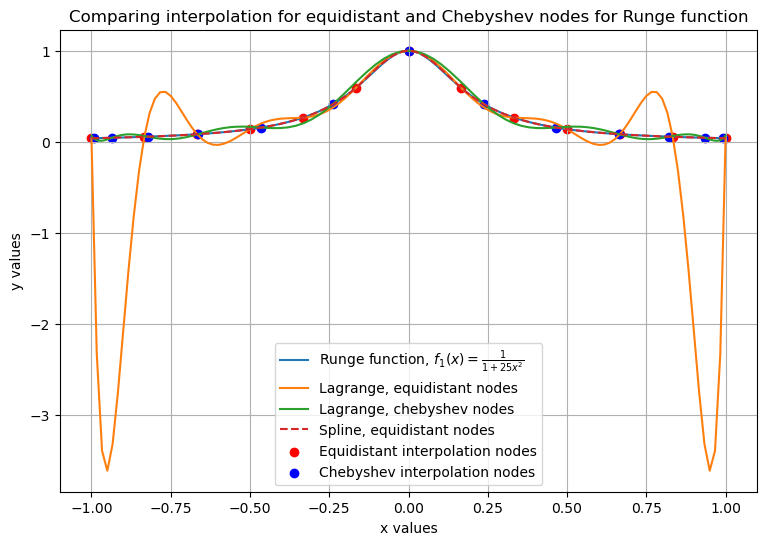

In [9]:
spline_equidistant = spline_fun(x_sample_equidistant)
y_values = f1(x_sample_equidistant)
plt.figure(figsize = (9, 6))

plt.plot(x_sample_equidistant, y_values, label = r'Runge function, $f_1(x)=\frac{1}{1+25x^2}$')
plt.plot(x_sample_equidistant, lagrange_equidistant, label = 'Lagrange, equidistant nodes')
plt.plot(x_sample_chebyshev, lagrange_chebyshev, label = 'Lagrange, chebyshev nodes')
plt.plot(x_sample_equidistant, spline_equidistant, label = 'Spline, equidistant nodes', linestyle = 'dashed')
plt.scatter(x_nodes_equidistant, y_nodes_equidistant, color = 'red', label = 'Equidistant interpolation nodes')
plt.scatter(x_nodes_chebyshev, y_nodes_chebyshev, color = 'blue', label = 'Chebyshev interpolation nodes')

plt.xlabel("x values")
plt.ylabel("y values")
plt.title("Comparing interpolation for equidistant and Chebyshev nodes for Runge function")
plt.legend()
plt.grid()
plt.show()

Alternatywnie przedstawiamy także wyniki na dwóch oddzielnych wykresach, aby zwiększyć czytelność. Na wykresie po lewej umieszczamy równoodległe węzły interpolacji z odpowiednim wielomianem interpolacyjnym i splinem, a po prawej - to samo dla węzłów Czebyszewa.

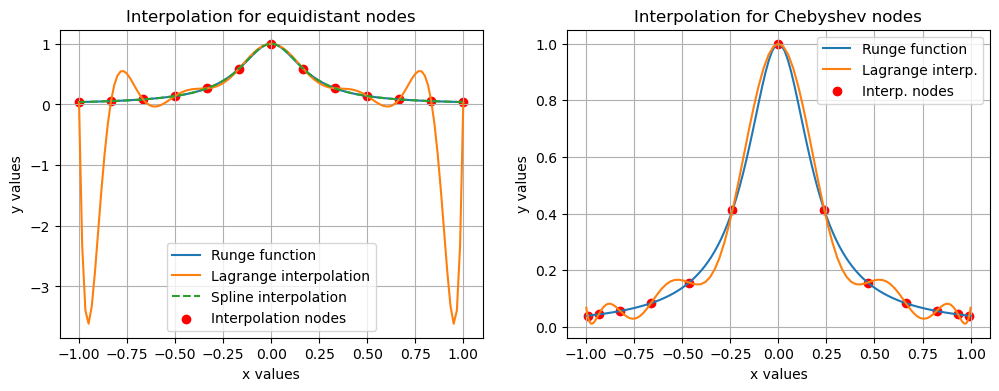

In [10]:
_, ax = plt.subplots(1, 2, figsize = (12, 4))

ax[0].plot(x_sample_equidistant, y_values, label = 'Runge function')
ax[0].plot(x_sample_equidistant, lagrange_equidistant, label = 'Lagrange interpolation')
ax[0].plot(x_sample_equidistant, spline_equidistant, label = 'Spline interpolation', linestyle = 'dashed')
ax[0].scatter(x_nodes_equidistant, y_nodes_equidistant, color = 'red', label = 'Interpolation nodes')

ax[0].set_title("Interpolation for equidistant nodes")
ax[0].set_xlabel("x values")
ax[0].set_ylabel("y values")
ax[0].legend()
ax[0].grid()

#----------------------------------------#

ax[1].plot(x_sample_equidistant, y_values, label = 'Runge function')
ax[1].plot(x_sample_chebyshev, lagrange_chebyshev, label = 'Lagrange interp.')
ax[1].scatter(x_nodes_chebyshev, y_nodes_chebyshev, color = 'red', label = 'Interp. nodes')

ax[1].set_title("Interpolation for Chebyshev nodes")
ax[1].set_xlabel("x values")
ax[1].set_ylabel("y values")
ax[1].legend()
ax[1].grid()

## Interpolacja dla różnej liczby węzłów

Najpierw wybieramy losowo 500 punktów z dziedziny funkcji dla $f_1$ i $f_2$. 

In [11]:
np.random.seed(1)

f1_points = np.random.uniform(-1, 1, 500)
f2_points = np.random.uniform(0, 2 * np.pi, 500)
x_sample = [(f1, f1_points), (f2, f2_points)]

Poniżej funkcja obliczająca normy wektorów błędu dla danej aproksymacji.

In [12]:
def calculate_err_vec(fun_vals, approx_vals):
    return np.linalg.norm(np.abs(fun_vals - approx_vals))

Policzmy teraz normy wektorów błędu dla poszczególnych funkcji i metod interpolacji, wymienionych wcześniej.

In [13]:
err_vec = {}
err_vec[f1] = {"lagrange_equidistant": [], "spline_equidistant" : [], "lagrange_chebyshev" : []}
err_vec[f2] = {"lagrange_equidistant": [], "spline_equidistant" : [], "lagrange_chebyshev" : []}
for f, f_points in x_sample:
    for n in range(4, 51):
        x_nodes_equidistant_n, y_nodes_equidistant_n = generate_n_equidistant(n, f)
        x_nodes_chebyshev_n, y_nodes_chebyshev_n = generate_n_chebyshev(n, f)

        lagrange_equidistant_n = lagrange_interpolation_values(f_points, x_nodes_equidistant_n, y_nodes_equidistant_n)
        spline_fun_n = spline.interp1d(x_nodes_equidistant_n, y_nodes_equidistant_n, kind = 'cubic')
        spline_equidistant_n = spline_fun_n(f_points)
        lagrange_chebyshev_n = lagrange_interpolation_values(f_points, x_nodes_chebyshev_n, y_nodes_chebyshev_n)

        fun_vals = f(f_points)
        approx_vals = np.array([lagrange_equidistant_n, spline_equidistant_n, lagrange_chebyshev_n])

        err_vec[f]["lagrange_equidistant"].append(calculate_err_vec(fun_vals, lagrange_equidistant_n))
        err_vec[f]["spline_equidistant"].append(calculate_err_vec(fun_vals, spline_equidistant_n))
        err_vec[f]["lagrange_chebyshev"].append(calculate_err_vec(fun_vals, lagrange_chebyshev_n))


### Wykresy

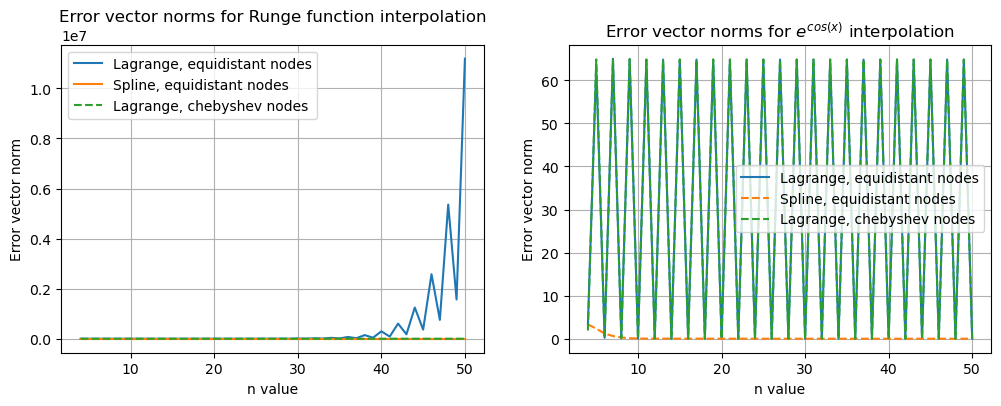

In [14]:
ns = np.arange(4, 51)
_, ax = plt.subplots(1, 2, figsize = (12, 4))


ax[0].plot(ns, err_vec[f1]["lagrange_equidistant"], label = 'Lagrange, equidistant nodes')
ax[0].plot(ns, err_vec[f1]["spline_equidistant"], label = 'Spline, equidistant nodes')
ax[0].plot(ns, err_vec[f1]["lagrange_chebyshev"], label = 'Lagrange, chebyshev nodes', linestyle = 'dashed')

ax[0].set_title("Error vector norms for Runge function interpolation")
ax[0].set_xlabel("n value")
ax[0].set_ylabel("Error vector norm")
ax[0].legend()
ax[0].grid()

#----------------------------------------#

ax[1].plot(ns, err_vec[f2]["lagrange_equidistant"], label = 'Lagrange, equidistant nodes')
ax[1].plot(ns, err_vec[f2]["spline_equidistant"], label = 'Spline, equidistant nodes', linestyle = 'dashed')
ax[1].plot(ns, err_vec[f2]["lagrange_chebyshev"], label = 'Lagrange, chebyshev nodes', linestyle = 'dashed')

ax[1].set_title(r"Error vector norms for $e^{cos(x)}$ interpolation")
ax[1].set_xlabel("n value")
ax[1].set_ylabel("Error vector norm")
ax[1].legend()
ax[1].grid()

### Poprawione wykresy

Obliczmy błędy, tym razem biorąc wartość bezwzględną wyniku interpolacji Lagrange'a i przedstawiając wykresy w skali logarytmicznej.

In [15]:
err_vec = {}
err_vec[f1] = {"lagrange_equidistant": [], "spline_equidistant" : [], "lagrange_chebyshev" : []}
err_vec[f2] = {"lagrange_equidistant": [], "spline_equidistant" : [], "lagrange_chebyshev" : []}
for f, f_points in x_sample:
    for n in range(4, 51):
        x_nodes_equidistant_n, y_nodes_equidistant_n = generate_n_equidistant(n, f)
        x_nodes_chebyshev_n, y_nodes_chebyshev_n = generate_n_chebyshev(n, f)

        lagrange_equidistant_n = np.abs(lagrange_interpolation_values(f_points, x_nodes_equidistant_n, y_nodes_equidistant_n))
        spline_fun_n = spline.interp1d(x_nodes_equidistant_n, y_nodes_equidistant_n, kind = 'cubic')
        spline_equidistant_n = spline_fun_n(f_points)
        lagrange_chebyshev_n = np.abs(lagrange_interpolation_values(f_points, x_nodes_chebyshev_n, y_nodes_chebyshev_n))

        fun_vals = f(f_points)
        approx_vals = np.array([lagrange_equidistant_n, spline_equidistant_n, lagrange_chebyshev_n])

        err_vec[f]["lagrange_equidistant"].append(calculate_err_vec(fun_vals, lagrange_equidistant_n))
        err_vec[f]["spline_equidistant"].append(calculate_err_vec(fun_vals, spline_equidistant_n))
        err_vec[f]["lagrange_chebyshev"].append(calculate_err_vec(fun_vals, lagrange_chebyshev_n))

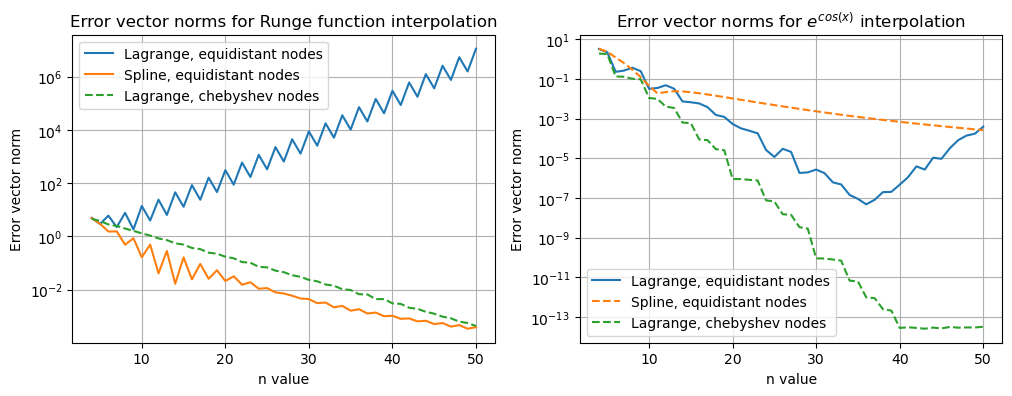

In [16]:
ns = np.arange(4, 51)
_, ax = plt.subplots(1, 2, figsize = (12, 4))


ax[0].plot(ns, err_vec[f1]["lagrange_equidistant"], label = 'Lagrange, equidistant nodes')
ax[0].plot(ns, err_vec[f1]["spline_equidistant"], label = 'Spline, equidistant nodes')
ax[0].plot(ns, err_vec[f1]["lagrange_chebyshev"], label = 'Lagrange, chebyshev nodes', linestyle = 'dashed')

ax[0].set_title("Error vector norms for Runge function interpolation")
ax[0].set_xlabel("n value")
ax[0].set_ylabel("Error vector norm")
ax[0].legend()
ax[0].grid()
ax[0].set_yscale("log")

#----------------------------------------#

ax[1].plot(ns, err_vec[f2]["lagrange_equidistant"], label = 'Lagrange, equidistant nodes')
ax[1].plot(ns, err_vec[f2]["spline_equidistant"], label = 'Spline, equidistant nodes', linestyle = 'dashed')
ax[1].plot(ns, err_vec[f2]["lagrange_chebyshev"], label = 'Lagrange, chebyshev nodes', linestyle = 'dashed')

ax[1].set_title(r"Error vector norms for $e^{cos(x)}$ interpolation")
ax[1].set_xlabel("n value")
ax[1].set_ylabel("Error vector norm")
ax[1].set_yscale("log")
ax[1].legend()
ax[1].grid()